Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 09 - Test P1: time and frequency domain analysis of sdof systems

[P1:2019](#P1_2019) - [Question 1](#P1_2019_1), 
[Question 2](#P1_2019_2), 
[Question 3](#P1_2019_3), 
[Question 4](#P1_2019_4).

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## P1:2019 <a name="P1_2019"></a> 

### Question 1 (2 points)  <a name="P1_2019_1"></a> 

A tower is modelled as a single degree of freedom system with effective mass $m = 50000$kg. 
Figure 1 presents a sample record for its free vibration response.  

1. Estimate the natural vibration frequency, $f_{\rm n}$, the effective damping ratio, $\zeta$, and the system stiffness, $k$, from the given record. 

2. What is the peak displacement response for an initial velocity, $v_0 = 2$m/s?  

3. What are the peak velocity and the peak acceleration corresponding to this 
    peak displacement?

<img src="testP1/P1_2019_fig1.png" alt="Heaviside" width="720px"/>

_Obs.: this first question provides the system parameters that shall be used in the following question._  

**Answer:** System properties can be estimated from record graphic inspection:


In [2]:
m  =  50000.                         # given system effective mass

fn =  10/10                          # 10 cycles in 10 seconds
zt =  np.log(1.5/0.3)/(2*np.pi*10)   # logarithmic decay in 10 cycles
k  =  m*(2*np.pi*fn)**2              # stiffness from frequency equation

print('Natural vibration frequency: {0:5.2f} Hz  '.format(fn))
print('Ratio of critical damping:   {0:5.2f} %   '.format(100*zt))
print('System stiffness:            {0:5.0f} kN/m'.format(k/1000))


Natural vibration frequency:  1.00 Hz  
Ratio of critical damping:    2.56 %   
System stiffness:             1974 kN/m


The peak values of kinematic parameters are calculated from the free vibration formula:

In [3]:
u0 =  0.                      # given initial displacement
v0 =  2.                      # given initial velocity 

wn =  2*np.pi*fn              # undamped natural frequency
wD =  wn*np.sqrt(1 - zt*zt)   # damped natural frequency

up =  np.sqrt(u0**2 + ((v0 + 2*zt*wn*u0)/wD)**2)
vp =  wD*up
ap = (wD**2)*up

print('Peak displacement: {0:6.2f} m    '.format(up))
print('Peak velocity:     {0:6.2f} m/s  '.format(vp))
print('Peak acceleration: {0:6.2f} m/s^2'.format(ap))


Peak displacement:   0.32 m    
Peak velocity:       2.00 m/s  
Peak acceleration:  12.56 m/s^2


### Question 2 (2 points) <a name="P1_2019_2"></a> 

The system is now subjected to a triagular impulsive load, $F(t)$, as depicted in figure 2. 

1. Estimate the peak displacement considering 
   $F_0 = 50$kN, with $t_0 = 1$s and $t_{\rm d} = 0.25$s. 
2. Estimate the time instant where this peak displacement occurs. 

<img src="testP1/P1_2019_fig2.png" alt="Heaviside" width="320px"/>  

**Answer:** The load has short duration ($t_{\rm d} < T_{\rm n}/4$) and can be converted 
into an equivalent initial velocity.


In [4]:
I0 =  50000*0.25/2   # impulse by short duration load
v0 =  I0/m           # equivalent initial velocity 
u0 =  0.             # no initial displacement given

up =  np.sqrt(u0**2 + ((v0 + 2*zt*wn*u0)/wD)**2)

print('Equivalent initial velocity: {0:6.3f} m/s'.format(v0))
print('Peak displacement:           {0:6.3f} m  '.format(up))


Equivalent initial velocity:  0.125 m/s
Peak displacement:            0.020 m  


The response to a short impulse is a sine function. Hence, the displacement peak will
occur approximately $T_{\rm n}/4 = 0.25$s after the impulse onset, what means at $t = 1.25$s.


### Question 3 (3 points) <a name="P1_2019_3"></a> 

The system is then subjected to a transiente load provided as a time series, 
$F_i = F(t_i) = F(i\Delta t)$, as given in figure 3 below with load units \[kN\]. 

1. Estimate the peak displacement by regarding the system response as a superposition of four discrete impulses. 
2. Estimate the time instant where this peak displacement occurs.

<img src="testP1/P1_2019_fig3.png" alt="Heaviside" width="320px"/>  

**Answer:** This loading function is too long to be considered as a single impulse.
It will be considered a series of impulses, as in the concept of Duhamel integral.
The system response for an impulse at $t_i$ can be calculated as:

$$ u_i(t) = \frac{v_{0,i}}{\omega_{\rm D}} \; 
            e^{-\zeta \omega_{\rm n} (t - t_i)} \; 
            \sin \omega_{\rm D} (t - t_i)$$

with:

$$ v_{0,i} = \frac{I_i}{m}$$

where the discrete impulse, $I_i$, may be approximated by:

$$ I_i \approx \Delta t \, F_i $$

The total response is the sum of these responses, where the starting times must be considered.
Firstly we input the loading function as a ```numpy``` vector.


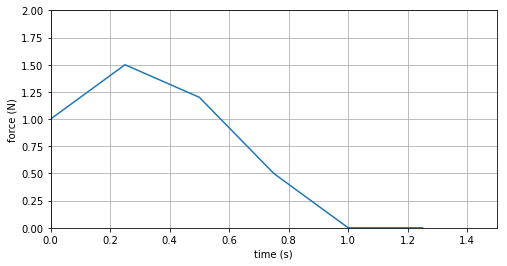

In [5]:
ti = np.array([0.00, 0.25, 0.50, 0.75, 1.00, 1.25])        # starting times of each impulse
Fi = np.array([1.00, 1.50, 1.20, 0.50, 0.00, 0.00])*1000   # force value at the starting time

plt.figure(1, figsize=(8, 4), clear=True)
plt.plot(ti, Fi/1000)

plt.xlim(0, 1.5);   plt.xlabel('time (s)') 
plt.ylim(0, 2.0);   plt.ylabel('force (N)') 

plt.grid(True) 


and then we calculate the equivalent initial velocities and superpose:

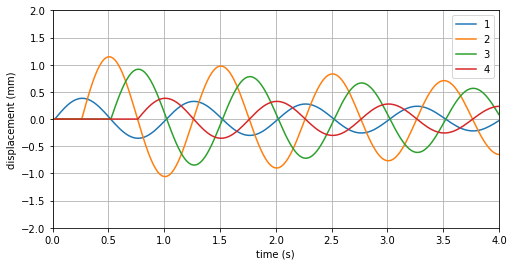

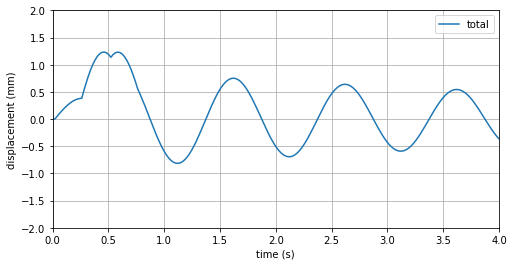

In [6]:
Dt    = 0.25     # load function time step
Ii    = Dt*Fi    # impulse values
Ii[0] = Ii[0]/2  # accounts for only half time step
v0    = Ii/m     # corresponding initial velocities

t  = np.linspace(0, 4, 200)  # time domain discretization
u  = np.zeros(t.shape)       # reset total displacement
dt = 4/200                   # time domain resolution

plt.figure(2, figsize=(8, 4), clear=True)
plt.xlim( 0.0, 4.0);   plt.xlabel('time (s)') 
plt.ylim(-2.0, 2.0);   plt.ylabel('displacement (mm)')
plt.grid(True)

for i in range(4):
    
    ui = np.zeros(t.shape)   # reset displacement component
    i0 = 1 + int(ti[i]/dt)   # impulse starting point

    ui[i0:]  = (v0[i]/wD)*np.exp(-zt*wn*t[:-i0])*np.sin(wD*t[:-i0])
    u       +=  ui
    
    plt.plot(t, 1000*ui)

plt.legend(('1', '2', '3', '4'))
plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(t, 1000*u)
plt.xlim( 0.0, 4.0);   plt.xlabel('time (s)') 
plt.ylim(-2.0, 2.0);   plt.ylabel('displacement (mm)') 
plt.legend(('total',))
plt.grid(True)
    

By observing the first time steps it can be concluded that the maximum displacement is
approximately 1.25mm occuring around $t = 0.5$s.

### Question 4 (3 points) <a name="P1_2019_4"></a> 

The system is finally subjected to an horizontal ground acceleration, $a_{\rm G}(t)$, given as a power spectral density, $S_{\rm a_G}(f)$, in units \[${\rm g^2/Hz}$\], $g = 9.81{\rm m/s^2}$, as shown in figure 4 below. 

1. Estimate the r.m.s. displacement through a frequency domain analysis. 
2. Estimate how much of this response is due to system resonance with seismic loading.

<img src="testP1/P1_2019_fig4.png" alt="Heaviside" width="320px"/>

**Answer:** The power spectral density of the displacement response is given by

$$ S_u(f) = \left| H(f) \right|^2 \; S_{\rm a_G}(f) $$

where we regard that the equilibrium equation has been divided by the system mass and:

$$ \left| H(f) \right|^2 = \left\{ \omega_{\rm n}^4 \left[
               (1 - \beta^2)^2 + (2 \zeta \beta)^2
               \right] \right\}^{-1} $$ 

with $\beta = \omega / \omega_{\rm n}$.

To calculate the r.m.s. value of the displacement response, the function $S_u(f)$ must
be integrated over the whole frequency domain.
The $S_{\rm a_G}(f)$ is constant within two frequency intervals and this must be taken
into account for the integration scheme.

Firstly we prepare the discretization of frequency domain and the admittance function:


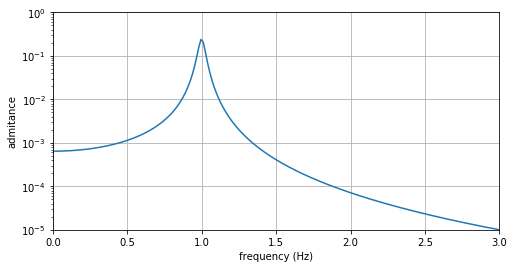

In [7]:
f   = np.linspace(0, 3, 200)                     # be aware that fn = 1Hz, so f = beta
Df  = 3/200                                      # frequency domain resolution
Hf2 = 1/((wn**4)*((1 - f**2)**2 + (2*zt*f)**2))  # admittance for unit mass

plt.figure(4, figsize=(8, 4), clear=True)
plt.semilogy(f, Hf2)
plt.xlim( 0.0, 3.0);   plt.xlabel('frequency (Hz)') 
plt.ylim(1e-5, 1e0);   plt.ylabel('admitance') 
plt.grid(True)


Then we prepare the discrete spectral density of ground acceleration:

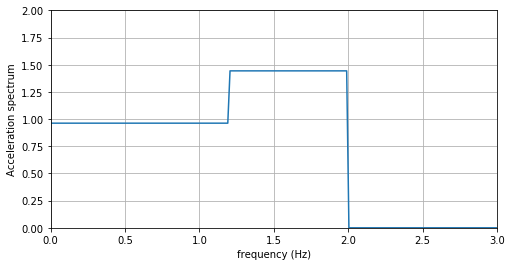

In [8]:
Sa = np.zeros(f.shape)   # reset the spectral density
i1 = int(1.2/Df)         # position of the first interval
i2 = int(2.0/Df)         # position of the second interval

Sa[ 0:i1] = 0.010*(9.81**2)
Sa[i1:i2] = 0.015*(9.81**2)

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Sa)
plt.xlim( 0.0, 3.0);   plt.xlabel('frequency (Hz)') 
plt.ylim( 0.0, 2.0);   plt.ylabel('Acceleration spectrum') 
plt.grid(True)


and finally we calculate and integrate the spectral density of system response:

Displacement r.m.s:  0.138m


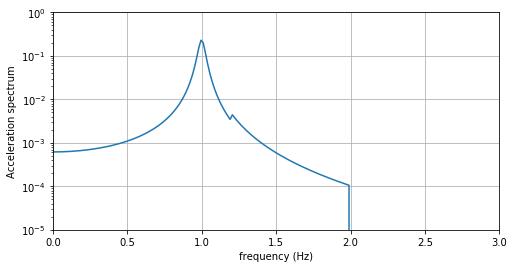

In [9]:
Su  = Hf2*Sa
su2 = np.sum(Su)*Df

plt.figure(6, figsize=(8, 4), clear=True)
plt.semilogy(f, Su)
plt.xlim( 0.0, 3.0);   plt.xlabel('frequency (Hz)') 
plt.ylim(1e-5, 1e0);   plt.ylabel('Acceleration spectrum') 
plt.grid(True)

print('Displacement r.m.s: {0:6.3f}m'.format(np.sqrt(su2)))


To know how much of this response is purely ressonant, we neglect the frequency dependent
part of the mechanical admittance. In this case the purely static admittance is simply:

$$ \left| H(f) \right|^2 = \omega_{\rm n}^{-4} $$ 

Hence:


In [10]:
Su  = Sa/(wn**4)
su2 = np.sum(Su)*Df

print('Displacement r.m.s: {0:6.3f}m'.format(np.sqrt(su2)))


Displacement r.m.s:  0.038m


This means that due to resonance the system r.m.s. response was raised from 0.038m to 0.138m.
